# Kolmogorov-Smirnov test for goodness of fit
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [1]:
!pip install yfinance
!pip install statsmodels==0.13.0
from scipy import stats, special
import yfinance as yf
from datetime import datetime, timedelta, date
import pandas as pd
import numpy as np
from statsmodels.tsa.forecasting.theta import ThetaModel

     |████████████████████████████████| 63 kB 962 kB/s 
     |████████████████████████████████| 6.4 MB 11.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 9.8 MB 4.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled s

In [2]:
stock = 'BTC-USD'
days = (365*3)
startdate = datetime.now() - timedelta(days=days)
df = yf.download(stock, startdate)[['Adj Close']]#.pct_change().dropna()
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2019-01-20,3601.013672
2019-01-21,3576.032471
2019-01-22,3604.577148
2019-01-23,3585.123047
2019-01-24,3600.865479
...,...
2022-01-15,43177.398438
2022-01-16,43113.878906
2022-01-17,42250.550781


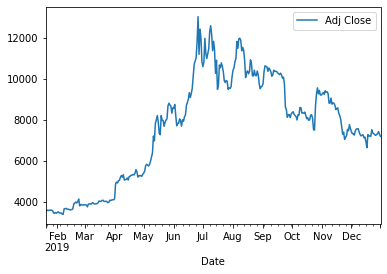

In [14]:
df[df.index.year == 2019].plot()

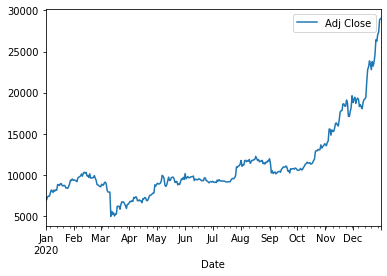

In [15]:
df[df.index.year == 2020].plot()

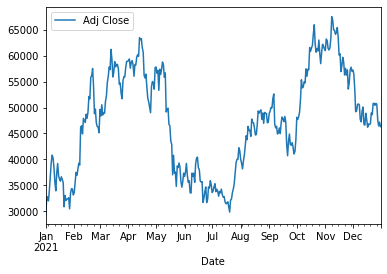

In [16]:
df[df.index.year == 2021].plot()

In [3]:
# Preparing data for kstest
df2019 = df[df.index.year == 2019]
df2019['Adj Close'].values

array([ 3601.01367188,  3576.0324707 ,  3604.57714844,  3585.12304688,
        3600.86547852,  3599.76586914,  3602.46044922,  3583.96582031,
        3470.45043945,  3448.11694336,  3486.18164062,  3457.79272461,
        3487.9453125 ,  3521.06079102,  3464.01342773,  3459.15405273,
        3466.35742188,  3413.76782227,  3399.47167969,  3666.78027344,
        3671.20361328,  3690.18823242,  3648.43066406,  3653.52856445,
        3632.07055664,  3616.88085938,  3620.81079102,  3629.78759766,
        3673.83618164,  3915.71435547,  3947.09448242,  3999.82055664,
        3954.11816406,  4005.52661133,  4142.52685547,  3810.42749023,
        3882.69628906,  3854.35791016,  3851.04736328,  3854.78540039,
        3859.58374023,  3864.41503906,  3847.17578125,  3761.55712891,
        3896.375     ,  3903.94262695,  3911.484375  ,  3901.1315918 ,
        3963.3137207 ,  3951.59985352,  3905.22729492,  3909.15625   ,
        3906.71728516,  3924.36914062,  3960.91113281,  4048.72583008,
      

Don’t reject null hypothesis in favor of alternative hypothesis: greater - p-value >= 0.05

In [4]:
# 1 sided kstest against normal distribution
kstest1sided = stats.kstest(rvs=df[df.index.year == 2019]['Adj Close'].values, 
             cdf='norm',
             N=100)
kstest1sided

KstestResult(statistic=1.0, pvalue=0.0)

In [5]:
# Distrubitons are NOT the same?
kstest1sided[1] <= 0.05

True

In [6]:
# 2 sided kstest against normal distribution
kstest2sided = stats.ks_2samp(df[df.index.year == 2019]['Adj Close'].values, 
                              df[df.index.year == 2020]['Adj Close'].values)
kstest2sided

Ks_2sampResult(statistic=0.43864303989386905, pvalue=9.992007221626409e-16)

In [7]:
# Distrubitons are NOT the same?
kstest2sided[1] <= 0.05

True

In [8]:
# Check all years against each other
years = list(df.index.year.unique())
for first_year in range(len(years)):
  for second_year in range(1, len(years)):
    kstest2sided = stats.ks_2samp(df[df.index.year == years[first_year]]['Adj Close'].values, 
                                  df[df.index.year == years[second_year]]['Adj Close'].values)
    print(years[first_year], 'vs.', years[second_year])
    print(kstest2sided)

2019 vs. 2020
Ks_2sampResult(statistic=0.43864303989386905, pvalue=9.992007221626409e-16)
2019 vs. 2021
Ks_2sampResult(statistic=1.0, pvalue=8.881784197001252e-16)
2019 vs. 2022
Ks_2sampResult(statistic=1.0, pvalue=4.538474127269612e-16)
2020 vs. 2020
Ks_2sampResult(statistic=0.0, pvalue=1.0)
2020 vs. 2021
Ks_2sampResult(statistic=1.0, pvalue=0.0)
2020 vs. 2022
Ks_2sampResult(statistic=1.0, pvalue=4.0952728445425283e-16)
2021 vs. 2020
Ks_2sampResult(statistic=1.0, pvalue=0.0)
2021 vs. 2021
Ks_2sampResult(statistic=0.0, pvalue=1.0)
2021 vs. 2022
Ks_2sampResult(statistic=0.5068493150684932, pvalue=8.127128195289934e-05)
2022 vs. 2020
Ks_2sampResult(statistic=1.0, pvalue=4.0952728445425283e-16)
2022 vs. 2021
Ks_2sampResult(statistic=0.5068493150684932, pvalue=8.127128195289934e-05)
2022 vs. 2022
Ks_2sampResult(statistic=0.0, pvalue=1.0)


In [10]:
# Testing against in sample and out of sample strategies
strat41 = pd.read_csv('strat41.csv')
strat41

,OOS,IS
0,-23.14,-23.14
1,29.00,37.51
2,-103.77,130.25
3,-23.14,192.59
4,-23.14,192.59
...,...,...
671,NaN,316.50
672,NaN,-97.75
673,NaN,-57.27
674,NaN,44.75


In [11]:
strat41IS = strat41['IS'].dropna()
strat41OOS = strat41['OOS'].dropna()

In [12]:
kstest2sided = stats.ks_2samp(strat41IS, 
                              strat41OOS)
kstest2sided

Ks_2sampResult(statistic=0.17455621301775148, pvalue=0.02478878373677662)

In [13]:
# Distrubitons are NOT the same?
if kstest2sided[1] <= 0.05 == "False":
  print('Returns are the same')
else:
  print('Returns are different')

Returns are different
